# Models generatius: *Gaussian Discriminant Analysis* (GDA) 

*Gaussian Discriminant Analysis* (GDA) és un mètode de classificació probabilístic que es basa en la teoria de les distribucions gaussianes per modelar les classes en un conjunt de dades. És una tècnica utilitzada àmpliament en problemes d’aprenentatge supervisat on es vol identificar la classe més probable d’una mostra desconeguda.

## Concepte Clau

El GDA assumeix que les dades de cada classe segueixen una distribució gaussiana multivariada definida per:

* Un vector de mitjanes ($\mu_k$) que representa el centre de la distribució per a la classe $k$.
* Una matriu de covariàncies ($\sum$) que descriu com estan correlacionades les característiques.

Basat en aquestes distribucions, el model estima la probabilitat que una mostra pertanyi a una classe determinada i classifica la mostra assignant-la a la classe amb la probabilitat més alta.


## Començam

En aquest exemple, utilitzarem el mètode Gaussian Discriminant Analysis (GDA) per a la classificació de dades. Les dades seran generades de manera sintètica mitjançant la funció ``make_moons`` de la llibreria ``scikit-learn``. Aquesta funció crea un conjunt de dades amb una distribució de dos tipus de classes en forma de dues llunes, una classe en cada "meitat" de les llunes.

### Importam les llibreries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import make_moons

### Cream les dades

In [47]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Informació del dataset
print(f"Nombre de mostres: {X.shape[0]}")
print(f"Nombre de característiques: {X.shape[1]}")
print("Classes:", np.unique(y))

Nombre de mostres: 300
Nombre de característiques: 2
Classes: [0 1]


### K-Fold

*K-Fold Cross Validation* és una tècnica d'avaluació de models que ajuda a obtenir una mesura més robusta del rendiment d'un model de classificació, especialment quan es disposa d'un conjunt de dades limitat. Aquesta tècnica divideix el conjunt de dades en **k** subconjunts o "folds", i utilitza cada subconjunt en múltiples etapes per entrenar i validar el model. Així es pot obtenir una estimació més fiable de la capacitat del model de generalitzar a noves dades.

Per fer aquesta tasca tornam a utilitzar ``scikit-learn``. Particularmnet, la funció [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). Aquesta funció té els següents paràmetres: 

- **n_splits**. Nombre de divisions a fer.
- **shuffle**. Booleà indicant si s'ha de mesclar la informació abans de dividir-la
- **random_stat**. Llavor aleatòria.

Retorna les diferents divisions de train i test, tot seguint la distribució de la mida d'entrenament sigui $k-1$ i la de test $1$. Feim una funció que ho engloba.

In [48]:
def cross_validate(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))

    return np.mean(scores), scores

Empram el model discrimanitiu de GDA també conegut com LinearDiscriminantAnalysis.

In [49]:
gda_model = QuadraticDiscriminantAnalysis()

# Avaluació inicial amb k-folds
mean_accuracy, fold_accuracies = cross_validate(gda_model, X, y, k=5)
print(f"Accuracy mitjana (5 folds): {mean_accuracy:.2f}")
print("Accuracy per cada fold:", fold_accuracies)

Accuracy mitjana (5 folds): 0.86
Accuracy per cada fold: [0.9, 0.9, 0.85, 0.7833333333333333, 0.8833333333333333]


## Visualitació


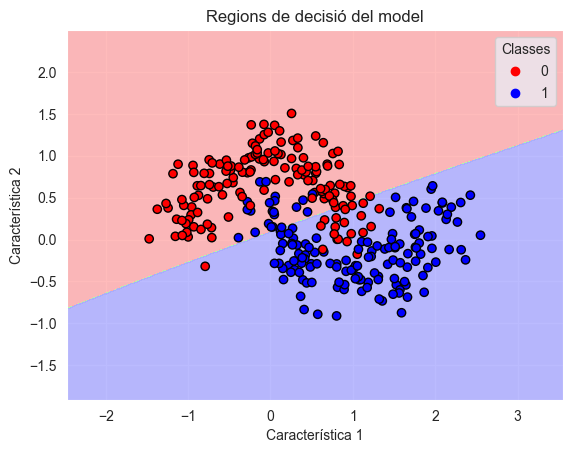

In [56]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, model, titol=None):
    """ Atenció: Codi més enllà del nivell de l'assignatura.  

    Args:
        X (np.array): Dades d'entrada.
        y (np.array): Etiquetes.
        model (scikit-learn.model): Model de ML.
        titol (str): Opcional, títol del gràfic.
    
    Returns:
        None
    """
    if titol is None:
        titol = "Regions de decisió del model"
        
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.title(titol)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.show()

plot_decision_regions(X, y, millor_model)

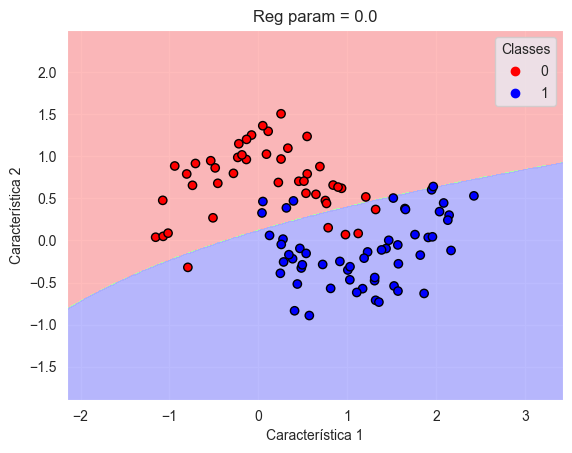

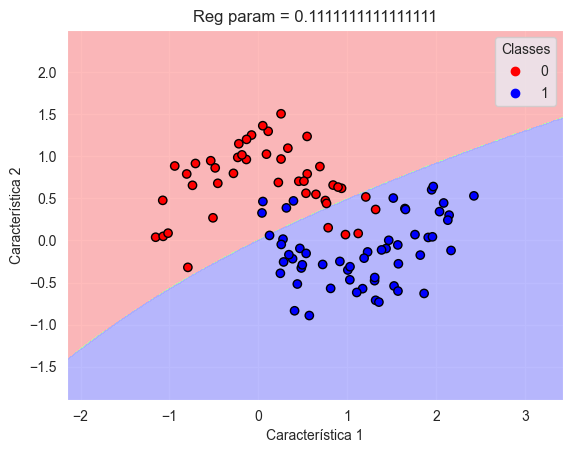

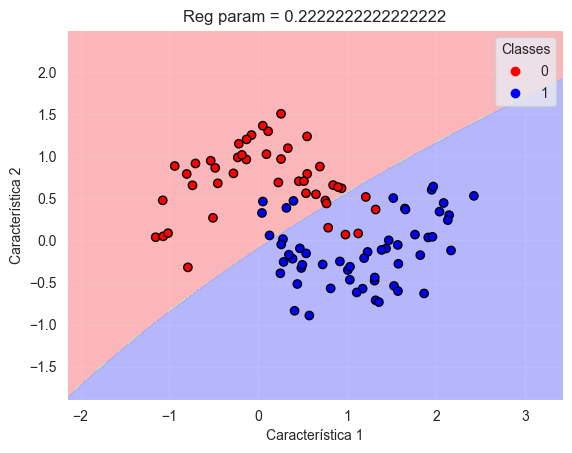

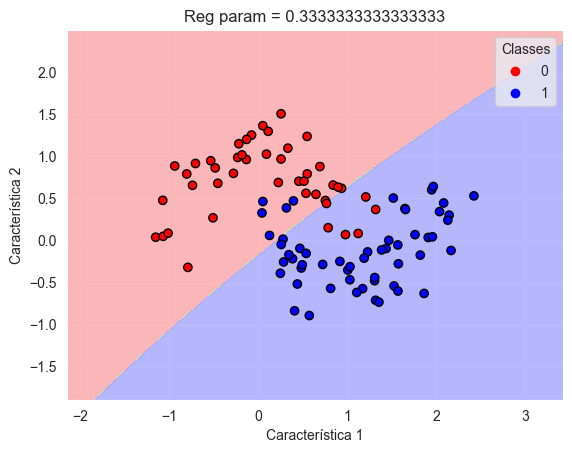

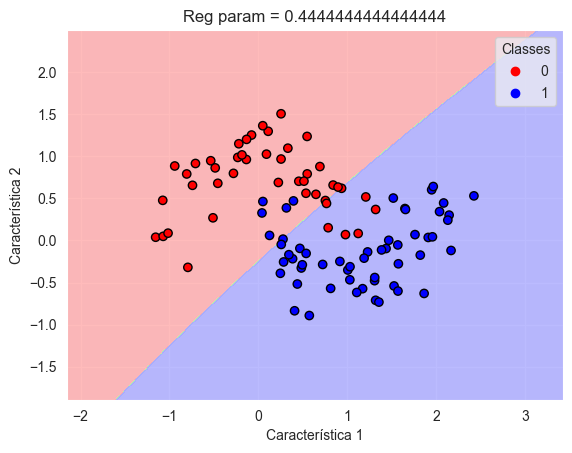

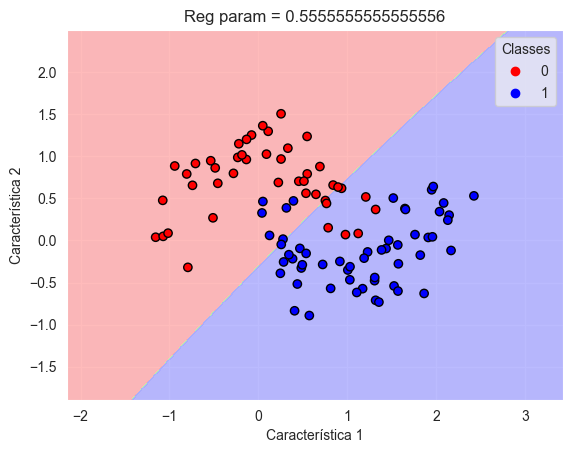

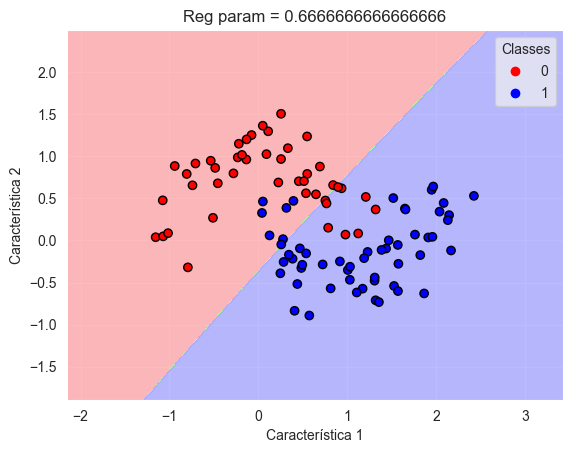

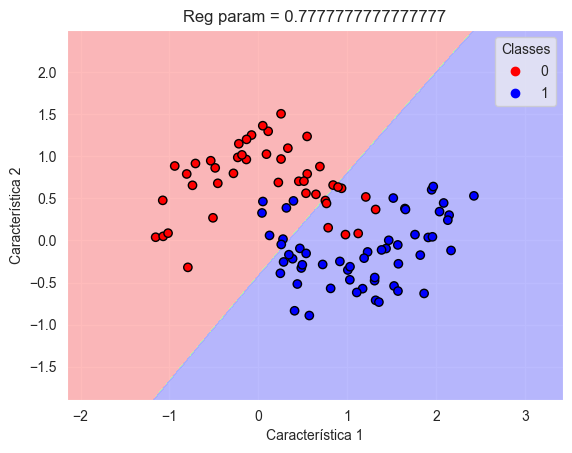

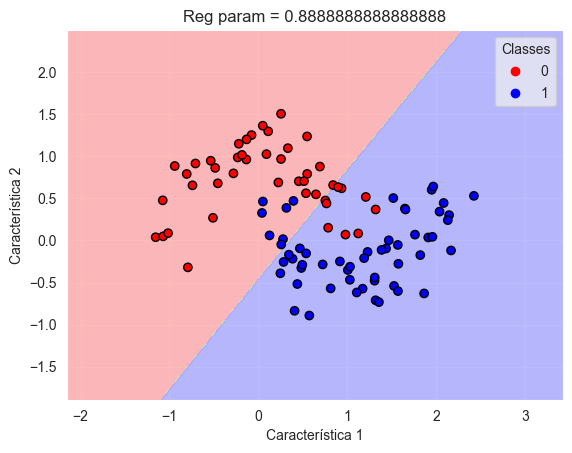

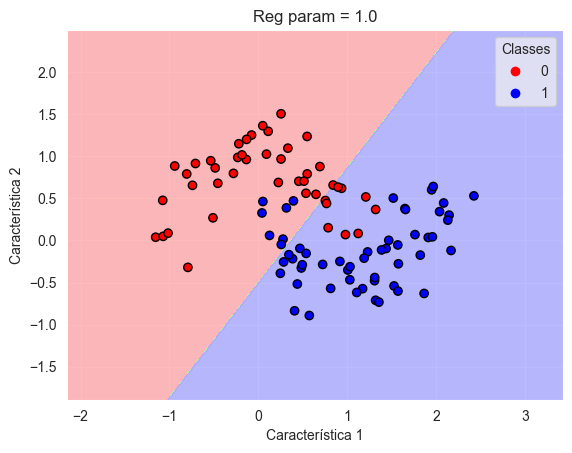

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for reg_param in param_grid['reg_param']:
    model = QuadraticDiscriminantAnalysis(reg_param = reg_param)
    model.fit(x_train,y_train)

    plot_decision_regions(x_test, y_test, model, titol=f"Reg param = {reg_param}")

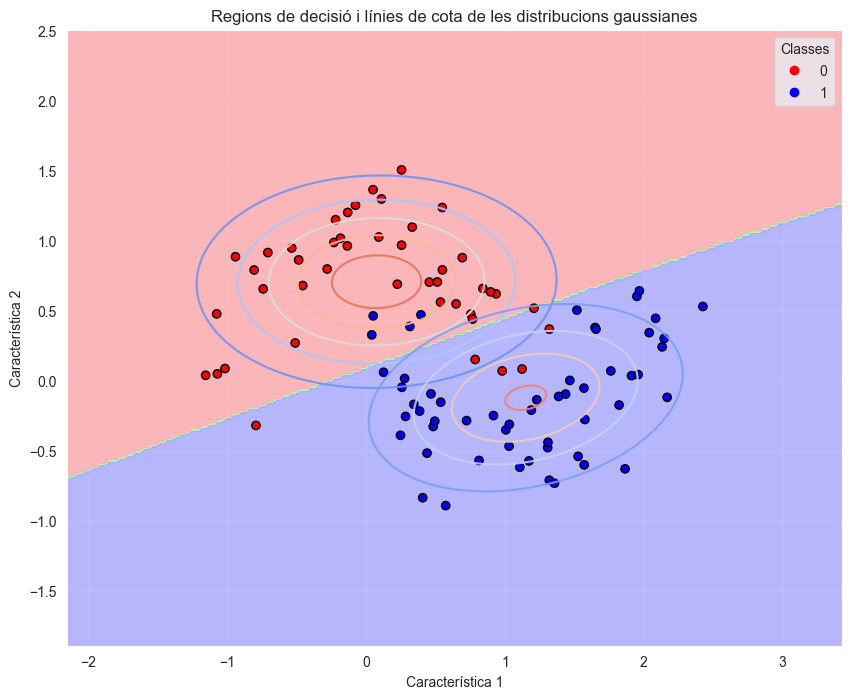

In [58]:
def plot_gaussian_decision_regions_with_contours(X, y, model):
    """ Atenció: Codi més enllà del nivell de l'assignatura.  
    
    Args:
        X(np.array): Dades d'entrada.
        y(np.array): Etiquetes.
        model(scikit-learn.model): Model de ML.

    Returns:
        None
    """
    plt.figure(figsize=(10, 8))
    
    # Generar una quadrícula de punts per a l'espai 2D
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predir la classe per a cada punt de la quadrícula
    predictions = model.predict(grid_points)
    predictions = predictions.reshape(xx.shape)

    # Pintar el fons segons les prediccions
    plt.contourf(xx, yy, predictions, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))

    # Dibuixar els punts del dataset
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolor='k')
    plt.legend(*scatter.legend_elements(), title="Classes")

    # Afegir les línies de cota per a les densitats de cada classe
    for class_idx in np.unique(y):
        # Seleccionar les mostres de la classe
        class_samples = X[y == class_idx]
        
        # Calcular la mitjana i covariància de la classe
        mean = np.mean(class_samples, axis=0)
        cov = np.cov(class_samples, rowvar=False)
        
        # Calcular la densitat de probabilitat per als punts de la quadrícula
        inv_cov = np.linalg.inv(cov)
        diff = grid_points - mean
        densities = np.exp(-0.5 * np.sum(diff @ inv_cov * diff, axis=1))
        densities /= (2 * np.pi * np.sqrt(np.linalg.det(cov)))  # Normalitzar

        # Dibuixar les línies de cota
        densities = densities.reshape(xx.shape)
        plt.contour(xx, yy, densities, levels=5, alpha=0.9, cmap='coolwarm')

    plt.title("Regions de decisió i línies de cota de les distribucions gaussianes")
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.show()

# Visualitzar les regions de decisió i les línies de cota
plot_gaussian_decision_regions_with_contours(x_test, y_test, millor_model)


## Resultats

### Matriu de confusió

Una matriu de confusió és una eina utilitzada en l'avaluació del rendiment d’un model de classificació. Proporciona una representació visual de com el model ha classificat les dades, mostrant la correspondència entre les etiquetes reals i les prediccions fetes pel model.

Es tracta d'una taula que generalment té les següents característiques:
- Les files representen les classes reals (etiquetes correctes).
- Les columnes representen les classes predites pel model.

És especialment útil en situacions a on les classes estan desequilibrades, ja que permet identificar possibles biaixos del model.



<Axes: >

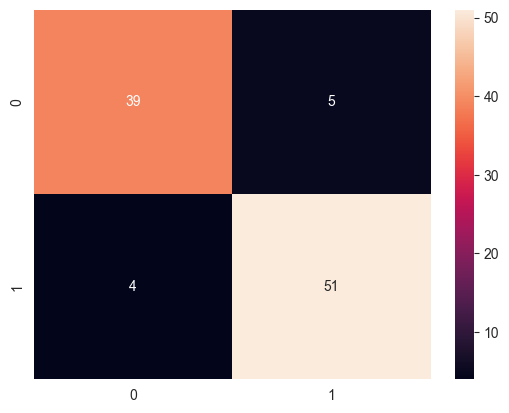

In [59]:
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [60]:
# Informe de classificació
print("Informe de classificació:")
print(classification_report(y_test, y_pred))

Informe de classificació:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.91      0.93      0.92        55

    accuracy                           0.91        99
   macro avg       0.91      0.91      0.91        99
weighted avg       0.91      0.91      0.91        99

